In [1]:
import matplotlib.pyplot as plt
from enhancement import load_image, per_pixel_average, CCGB, CLAHE, AGCCPF, Retinex

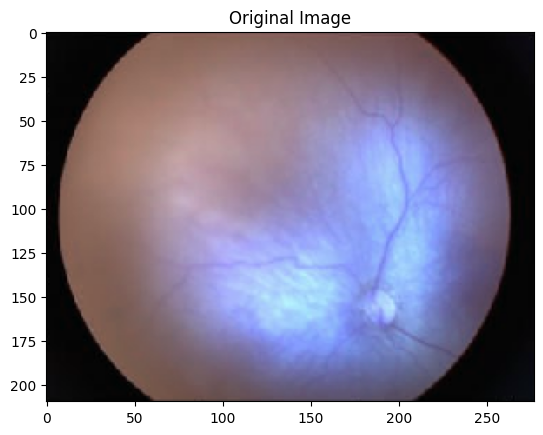

In [2]:
image = load_image("./images/degraded.png")
plt.title("Original Image")
plt.imshow(image)

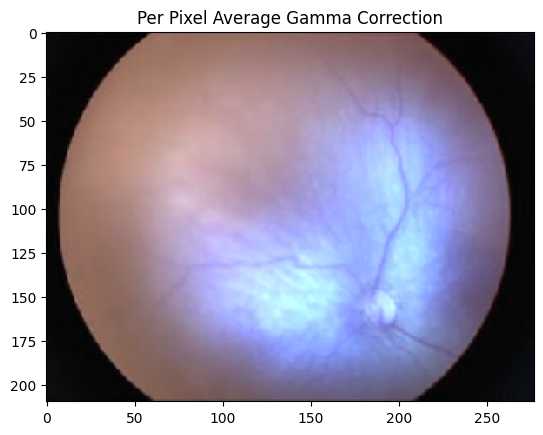

In [3]:
plt.title("Per Pixel Average Gamma Correction")
plt.imshow(per_pixel_average(image, 12))

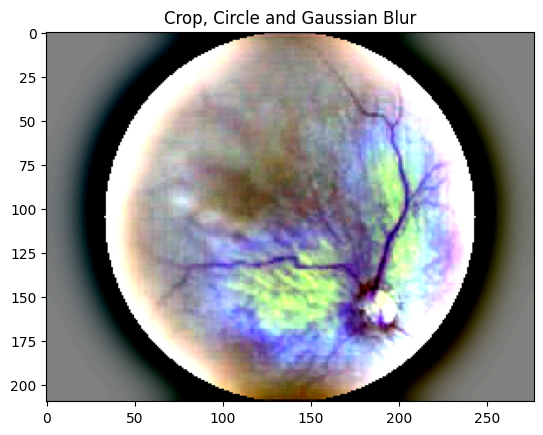

In [4]:
plt.title("Crop, Circle and Gaussian Blur")
plt.imshow(CCGB(image))

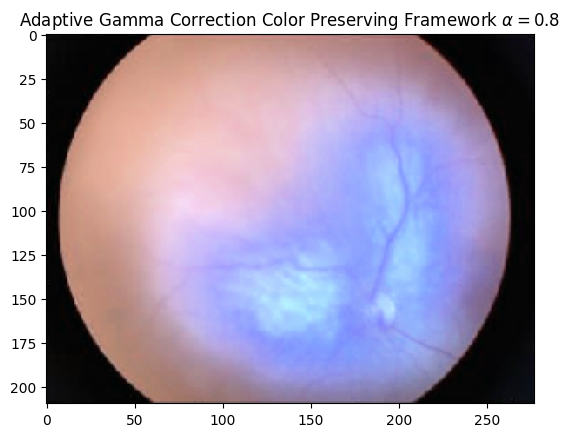

In [6]:
plt.title(r"Adaptive Gamma Correction Color Preserving Framework $\alpha = 0.8$")
plt.imshow(AGCCPF(image))

In [9]:
clahe = CLAHE(image, 2, (4, 4))

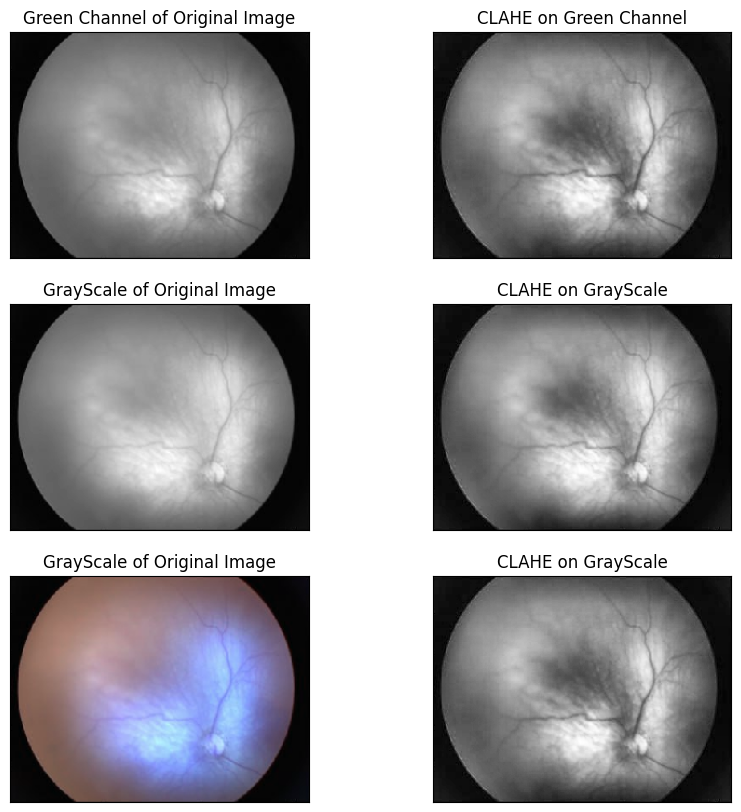

In [25]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

axs[0, 0].set_title("Green Channel of Original Image")
axs[0, 0].imshow(clahe.green, cmap="gray")
axs[0, 1].set_title("CLAHE on Green Channel")
axs[0, 1].imshow(clahe.apply_green(), cmap="gray")

axs[1, 0].set_title("GrayScale of Original Image")
axs[1, 0].imshow(clahe.grays, cmap="gray")
axs[1, 1].set_title("CLAHE on GrayScale")
axs[1, 1].imshow(clahe.apply_gray(), cmap="gray")

axs[2, 0].set_title("GrayScale of Original Image")
axs[2, 0].imshow(clahe.image)
axs[2, 1].set_title("CLAHE on GrayScale")
axs[2, 1].imshow(clahe.apply_green())

for ax in axs:
    for a in ax:
        a.set_xticks([])
        a.set_yticks([])